In [1]:
import numpy as np 

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json 
import csv
from geopy.geocoders import Nominatim 
import geocoder
import requests 
from bs4 import BeautifulSoup 

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print("Libraries imported.")

Libraries imported.


In [2]:
data=requests.get('https://en.wikipedia.org/wiki/Category:Neighbourhoods_in_Kolkata').text

In [3]:
dataframe=open('kol.csv','w')
csv_writer=csv.writer(dataframe)
csv_writer.writerow(["Neighbourhood"])
soup=BeautifulSoup(data,'lxml')
mcwg=soup.find_all(class_="mw-category-group")
length=len(mcwg)

In [4]:
mcwg[1]

<div class="mw-category-group"><h3>A</h3>
<ul><li><a href="/wiki/Abhirampur" title="Abhirampur">Abhirampur</a></li>
<li><a href="/wiki/Agarpara" title="Agarpara">Agarpara</a></li>
<li><a href="/wiki/Ajoy_Nagar" title="Ajoy Nagar">Ajoy Nagar</a></li>
<li><a href="/wiki/Alipore" title="Alipore">Alipore</a></li>
<li><a href="/wiki/Amodghata" title="Amodghata">Amodghata</a></li>
<li><a href="/wiki/Amtala" title="Amtala">Amtala</a></li>
<li><a href="/wiki/Anandapur,_Kolkata" title="Anandapur, Kolkata">Anandapur, Kolkata</a></li>
<li><a href="/wiki/Ankurhati" title="Ankurhati">Ankurhati</a></li>
<li><a href="/wiki/Argari" title="Argari">Argari</a></li>
<li><a href="/wiki/Asuti" title="Asuti">Asuti</a></li></ul></div>

In [5]:
for i in range(1,length):
    lists=mcwg[i].find_all('a')
    for j in lists:
        nbd=j.get('title')
        csv_writer.writerow([nbd])
dataframe.close()

In [26]:
df=df.drop(139)

In [156]:
df.reset_index(drop=True)

In [29]:
g = geocoder.arcgis('Manikpur,Kolkata, India'.format(neighborhood))
lat_lng_coords = g.latlng
lat_lng_coords

[22.647094198897054, 88.42233698147979]

In [30]:
df.to_csv("KOLKATA_LOCALITY.csv")

In [10]:
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{},Kolkata, India'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [11]:
coords = [ get_latlng(neighborhood) for neighborhood in df["Neighbourhood"].tolist() ]

In [ ]:
g = geocoder.arcgis('Manikpur,Kolkata, India'.format(neighborhood))
lat_lng_coords = g.latlng
lat_lng_coords

In [15]:
coords=pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

In [40]:
coords.shape

(198, 2)

In [41]:
df["Latitude"]=coords["Latitude"]
df["Longitude"]=coords["Longitude"]

In [62]:
df=df.reset_index(drop=True)


In [63]:
df[197:]["Latitude"]=lat_lng_coords[0]
df[197:]["Longitude"]=lat_lng_coords[1]

C:\Users\imhim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\imhim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [64]:
df.head()

,Neighbourhood,Latitude,Longitude
0,Abhirampur,22.530694,88.346503
1,Agarpara,22.684050,88.391650
2,Ajoy Nagar,22.489660,88.396400
3,Alipore,22.526600,88.335100
4,Amodghata,22.988010,88.388380


In [65]:
df.to_csv('kol_coordinates.csv')

In [66]:
# get the coordinates of kolkata
address = 'Kolkata, India'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Kolkata, India {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Kolkata, India 22.54541245, 88.3567751581234.


In [67]:
map_kolkata = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(df['Latitude'], df['Longitude'], df['Neighbourhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_kolkata)  
    
map_kolkata

In [24]:
map_kolkata.save('map_kolkata.html')

In [68]:
CLIENT_ID = 'your Foursquare ID' # your Foursquare ID
CLIENT_SECRET = 'your Foursquare Secret' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: your Foursquare ID
CLIENT_SECRET:your Foursquare Secret


In [69]:
CLIENT_ID = 'E1GHDNTGVO3PHIZBDK5SSYI24BQMEMORYMUXLH5HASGFBU5F'# your Foursquare ID
CLIENT_SECRET = '21JMBEZEAFY0KARX03EE235D1FGCB2TBI3SKHIIPFQXZXDDR' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: E1GHDNTGVO3PHIZBDK5SSYI24BQMEMORYMUXLH5HASGFBU5F
CLIENT_SECRET:21JMBEZEAFY0KARX03EE235D1FGCB2TBI3SKHIIPFQXZXDDR


In [70]:
def get_category_type(row):
    categories_list = row['Category']  
    
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [72]:
explore_df_list = []

for i, nbd_name in enumerate(df['Neighbourhood']):  
    
    try :
        ### Getting the data of neighbourhood
        nbd_name = df.loc[i, 'Neighbourhood']
        nbd_lat = df.loc[i, 'Latitude']
        nbd_lng = df.loc[i, 'Longitude']

        radius = 3000 # Setting the radius as 1000 metres
        LIMIT = 50# Getting the top 30 venues

        url = 'https://api.foursquare.com/v2/venues/explore?client_id={} \
        &client_secret={}&ll={},{}&v={}&radius={}&limit={}'\
        .format(CLIENT_ID, CLIENT_SECRET, nbd_lat, nbd_lng, VERSION, radius, LIMIT)

        results = json.loads(requests.get(url).text)
        results = results['response']['groups'][0]['items']

        nearby = json_normalize(results) # Flattens JSON

        # Filtering the columns
        filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
        nearby = nearby.loc[:, filtered_columns]

        # Renaming the columns
        columns = ['Name', 'Category', 'Latitude', 'Longitude']
        nearby.columns = columns

        # Gets the categories
        nearby['Category'] = nearby.apply(get_category_type, axis=1)    

        # Gets the data required
        for i, name in enumerate(nearby['Name']):
            s_list = nearby.loc[i, :].values.tolist()  # Converts the numpy array to a python list
            f_list = [nbd_name, nbd_lat, nbd_lng] + s_list
            explore_df_list.append(f_list)
    
    except Exception as e:
        pass


In [73]:

explore_df = pd.DataFrame([item for item in explore_df_list])
explore_df.columns = ['Neighbourhood', 'Neighbourhood Latitude', 'Neighbourhood Longitude', 'Venue Name', 'Venue Category', 'Venue Latitude', 'Venue Longitude']
explore_df.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue Name,Venue Category,Venue Latitude,Venue Longitude
0,Abhirampur,22.530694,88.346503,Balaram Mullick & Radharaman Mullick,Indian Sweet Shop,22.533097,88.347082
1,Abhirampur,22.530694,88.346503,Jai Hind Dhaba,Dhaba,22.533109,88.353268
2,Abhirampur,22.530694,88.346503,Balwant Singh's Eating House,Dhaba,22.537714,88.344220
3,Abhirampur,22.530694,88.346503,Oh! Calcutta,Bengali Restaurant,22.538357,88.351406
4,Abhirampur,22.530694,88.346503,Taj Bengal,Hotel,22.537459,88.334066


In [76]:
explore_df.to_csv('data_places.csv')

In [74]:
explore_df.shape

(5007, 7)

In [78]:
# One hot encoding
kolkata_onehot = pd.get_dummies(explore_df[['Venue Category']], prefix="", prefix_sep="")

kolkata_onehot .head()

,ATM,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Awadhi Restaurant,BBQ Joint,Bakery,Bank,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Bengali Restaurant,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brewery,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Convenience Store,Cricket Ground,Department Store,Dessert Shop,Dhaba,Diner,Dumpling Restaurant,Duty-free Shop,Electronics Store,Falafel Restaurant,Farm,Fast Food Restaurant,Field,Flea Market,Food,Food Court,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gastropub,Golf Course,Grocery Store,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Pool,IT Services,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Indie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kerala Restaurant,Light Rail Station,Lounge,Market,Mediterranean Restaurant,Men's Store,Metro Station,Military Base,Mobile Phone Shop,Motorcycle Shop,Movie Theater,Moving Target,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Museum,Music Venue,Nature Preserve,Neighborhood,Nightclub,North Indian Restaurant,Other Repair Shop,Park,Performing Arts Venue,Pharmacy,Pizza Place,Planetarium,Platform,Plaza,Pool,Pub,Resort,Restaurant,River,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Snack Place,Soccer Stadium,Soup Place,South Indian Restaurant,Sports Club,Stadium,Steakhouse,Supermarket,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theme Park,Tibetan Restaurant,Train Station,Tram Station,Vegetarian / Vegan Restaurant,Water Park,Women's Store,Zoo
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [80]:
# Add neighborhood column back to dataframe
kolkata_onehot['Neighbourhood'] = explore_df['Neighbourhood']
kolkata_onehot .head()



,ATM,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Awadhi Restaurant,BBQ Joint,Bakery,Bank,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Bengali Restaurant,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brewery,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Convenience Store,Cricket Ground,Department Store,Dessert Shop,Dhaba,Diner,Dumpling Restaurant,Duty-free Shop,Electronics Store,Falafel Restaurant,Farm,Fast Food Restaurant,Field,Flea Market,Food,Food Court,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gastropub,Golf Course,Grocery Store,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Pool,IT Services,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Indie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kerala Restaurant,Light Rail Station,Lounge,Market,Mediterranean Restaurant,Men's Store,Metro Station,Military Base,Mobile Phone Shop,Motorcycle Shop,Movie Theater,Moving Target,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Museum,Music Venue,Nature Preserve,Neighborhood,Nightclub,North Indian Restaurant,Other Repair Shop,Park,Performing Arts Venue,Pharmacy,Pizza Place,Planetarium,Platform,Plaza,Pool,Pub,Resort,Restaurant,River,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Snack Place,Soccer Stadium,Soup Place,South Indian Restaurant,Sports Club,Stadium,Steakhouse,Supermarket,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theme Park,Tibetan Restaurant,Train Station,Tram Station,Vegetarian / Vegan Restaurant,Water Park,Women's Store,Zoo,Neighbourhood
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Abhirampur
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Abhirampur
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Abhirampur
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Abhirampur
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Abhirampur


In [83]:
venues = [kolkata_onehot.columns[-1]] + kolkata_onehot.columns[:-1].values.tolist()
len(venues)

135

In [84]:
kolkata_onehot = kolkata_onehot[fixed_columns]

kolkata_onehot.head()

,Neighbourhood,ATM,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Awadhi Restaurant,BBQ Joint,Bakery,Bank,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Bengali Restaurant,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brewery,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Convenience Store,Cricket Ground,Department Store,Dessert Shop,Dhaba,Diner,Dumpling Restaurant,Duty-free Shop,Electronics Store,Falafel Restaurant,Farm,Fast Food Restaurant,Field,Flea Market,Food,Food Court,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gastropub,Golf Course,Grocery Store,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Pool,IT Services,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Indie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kerala Restaurant,Light Rail Station,Lounge,Market,Mediterranean Restaurant,Men's Store,Metro Station,Military Base,Mobile Phone Shop,Motorcycle Shop,Movie Theater,Moving Target,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Museum,Music Venue,Nature Preserve,Neighborhood,Nightclub,North Indian Restaurant,Other Repair Shop,Park,Performing Arts Venue,Pharmacy,Pizza Place,Planetarium,Platform,Plaza,Pool,Pub,Resort,Restaurant,River,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Snack Place,Soccer Stadium,Soup Place,South Indian Restaurant,Sports Club,Stadium,Steakhouse,Supermarket,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theme Park,Tibetan Restaurant,Train Station,Tram Station,Vegetarian / Vegan Restaurant,Water Park,Women's Store,Zoo
0,Abhirampur,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Abhirampur,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Abhirampur,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Abhirampur,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Abhirampur,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [85]:
kolkata_onehot.shape

(5007, 135)

In [86]:
kolkata_grouped = kolkata_onehot.groupby('Neighbourhood').mean().reset_index()
kolkata_grouped.head()

,Neighbourhood,ATM,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Awadhi Restaurant,BBQ Joint,Bakery,Bank,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Bengali Restaurant,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brewery,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Convenience Store,Cricket Ground,Department Store,Dessert Shop,Dhaba,Diner,Dumpling Restaurant,Duty-free Shop,Electronics Store,Falafel Restaurant,Farm,Fast Food Restaurant,Field,Flea Market,Food,Food Court,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gastropub,Golf Course,Grocery Store,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Pool,IT Services,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Indie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kerala Restaurant,Light Rail Station,Lounge,Market,Mediterranean Restaurant,Men's Store,Metro Station,Military Base,Mobile Phone Shop,Motorcycle Shop,Movie Theater,Moving Target,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Museum,Music Venue,Nature Preserve,Neighborhood,Nightclub,North Indian Restaurant,Other Repair Shop,Park,Performing Arts Venue,Pharmacy,Pizza Place,Planetarium,Platform,Plaza,Pool,Pub,Resort,Restaurant,River,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Snack Place,Soccer Stadium,Soup Place,South Indian Restaurant,Sports Club,Stadium,Steakhouse,Supermarket,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theme Park,Tibetan Restaurant,Train Station,Tram Station,Vegetarian / Vegan Restaurant,Water Park,Women's Store,Zoo
0,Abhirampur,0.00,0.0,0.0,0.0,0.02,0.0,0.0,0.02,0.02,0.0400,0.02,0.06,0.0,0.0,0.0,0.0,0.0,0.04,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020,0.0800,0.0,0.00,0.0,0.0,0.0,0.0,0.0600,0.0,0.0,0.0,0.0,0.02,0.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0000,0.00,0.0,0.02,0.0,0.0000,0.0,0.0,0.0,0.02,0.0,0.0,0.0,0.0600,0.0,0.00,0.0,0.06,0.0400,0.0,0.0,0.0,0.04,0.0,0.0,0.0,0.0,0.02,0.0,0.04,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.00,0.0,0.06,0.0,0.020,0.0,0.0,0.0,0.0,0.06,0.0,0.0,0.04,0.0,0.00,0.0000,0.0,0.0,0.0,0.0,0.00,0.0,0.04,0.0,0.0000,0.0,0.0,0.0,0.020,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
1,Agarpara,0.25,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0000,0.0,0.00,0.0,0.0,0.0,0.0,0.2500,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0000,0.00,0.0,0.00,0.0,0.0000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0000,0.0,0.25,0.0,0.00,0.0000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.25,0.0000,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0000,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
2,Ajoy Nagar,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0625,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0625,0.0,0.00,0.0,0.0,0.0,0.0,0.0625,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0625,0.00,0.0,0.00,0.0,0.0625,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0625,0.0,0.00,0.0,0.00,0.0625,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0625,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.125,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0625,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0625,0.0,0.0,0.0,0.125,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
3,Alipore,0.00,0.0,0.0,0.0,0.02,0.0,0.0,0.00,0.04,0.0400,0.00,0.02,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.140,0.0600,0.0,0.02,0.0,0.0,0.0,0.0,0.0600,0.0,0.0,0.0,0.0,0.02,0.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0000,0.02,0.0,0.02,0.0,0.0000,0.0,0.0,0.0,0.02,0.0,0.0,0.0,0.0800,0.0,0.00,0.0,0.02,0.0200,0.0,0.0,0.0,0.02,

In [87]:
kolkata_grouped_sum = kolkata_onehot.groupby('Neighbourhood').sum().reset_index()
kolkata_grouped_sum.head()

,Neighbourhood,ATM,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Awadhi Restaurant,BBQ Joint,Bakery,Bank,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Bengali Restaurant,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brewery,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Convenience Store,Cricket Ground,Department Store,Dessert Shop,Dhaba,Diner,Dumpling Restaurant,Duty-free Shop,Electronics Store,Falafel Restaurant,Farm,Fast Food Restaurant,Field,Flea Market,Food,Food Court,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gastropub,Golf Course,Grocery Store,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Pool,IT Services,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Indie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kerala Restaurant,Light Rail Station,Lounge,Market,Mediterranean Restaurant,Men's Store,Metro Station,Military Base,Mobile Phone Shop,Motorcycle Shop,Movie Theater,Moving Target,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Museum,Music Venue,Nature Preserve,Neighborhood,Nightclub,North Indian Restaurant,Other Repair Shop,Park,Performing Arts Venue,Pharmacy,Pizza Place,Planetarium,Platform,Plaza,Pool,Pub,Resort,Restaurant,River,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Snack Place,Soccer Stadium,Soup Place,South Indian Restaurant,Sports Club,Stadium,Steakhouse,Supermarket,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theme Park,Tibetan Restaurant,Train Station,Tram Station,Vegetarian / Vegan Restaurant,Water Park,Women's Store,Zoo
0,Abhirampur,0,0,0,0,1,0,0,1,1,2,1,3,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,3,0,0,0,3,2,0,0,0,2,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,3,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,Agarpara,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Ajoy Nagar,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Alipore,0,0,0,0,1,0,0,0,2,2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,7,3,0,1,0,0,0,0,3,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,4,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,2,0,0,0,0,0,0,0,2,0,1,0,1,0,0,0,0,2,0,0,2,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,Amodghata,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [102]:
len(kolkata_grouped_sum[kolkata_grouped_sum["Shopping Mall"] ==1])

33

In [111]:
t=dict(kolkata_grouped_sum.sum(axis = 0, skipna = True) )

In [112]:
del t["Neighbourhood"]

In [113]:
t

{'ATM': 113,
 'Airport Lounge': 10,
 'Airport Service': 7,
 'Airport Terminal': 10,
 'American Restaurant': 21,
 'Art Gallery': 2,
 'Art Museum': 30,
 'Arts & Crafts Store': 22,
 'Asian Restaurant': 93,
 'Awadhi Restaurant': 37,
 'BBQ Joint': 37,
 'Bakery': 157,
 'Bank': 3,
 'Bar': 3,
 'Bed & Breakfast': 1,
 'Beer Bar': 1,
 'Beer Garden': 2,
 'Bengali Restaurant': 104,
 'Boat or Ferry': 9,
 'Bookstore': 110,
 'Botanical Garden': 5,
 'Boutique': 39,
 'Bowling Alley': 2,
 'Brewery': 8,
 'Burger Joint': 1,
 'Bus Station': 20,
 'Bus Stop': 1,
 'Business Service': 2,
 'Café': 444,
 'Chinese Restaurant': 231,
 'Clothing Store': 46,
 'Coffee Shop': 102,
 'Convenience Store': 5,
 'Cricket Ground': 37,
 'Department Store': 106,
 'Dessert Shop': 6,
 'Dhaba': 119,
 'Diner': 7,
 'Dumpling Restaurant': 48,
 'Duty-free Shop': 1,
 'Electronics Store': 6,
 'Falafel Restaurant': 19,
 'Farm': 1,
 'Fast Food Restaurant': 89,
 'Field': 23,
 'Flea Market': 4,
 'Food': 4,
 'Food Court': 6,
 'Food Truck': 3,

In [160]:
t=pd.DataFrame.from_dict(t)

In [161]:
t.to_csv("kolkata_disribution.csv")

In [164]:
t.head()

,0
ATM,113
Airport Lounge,10
Airport Service,7
Airport Terminal,10
American Restaurant,21


In [121]:
kolkata_mall = kolkata_grouped_sum[["Neighbourhood","Shopping Mall"]]

In [123]:
kolkata_mall.head()

,Neighbourhood,Shopping Mall
0,Abhirampur,1
1,Agarpara,0
2,Ajoy Nagar,2
3,Alipore,0
4,Amodghata,0


In [128]:
kclusters = 4

kolkata_clustering = kolkata_mall.drop(["Neighbourhood"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(kolkata_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:30]

array([0, 1, 2, 1, 1, 2, 0, 0, 1, 1, 1, 0, 1, 1, 3, 2, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 2, 0, 1, 1, 1])

In [136]:
kolkata_means = kolkata_mall.copy()

# add clustering labels
kolkata_means["Cluster Labels"] = kmeans.labels_

In [140]:
kolkata_means.head()

,Neighbourhood,Shopping Mall,Cluster Labels
0,Abhirampur,1,0
1,Agarpara,0,1
2,Ajoy Nagar,2,2
3,Alipore,0,1
4,Amodghata,0,1


In [139]:
kolkata_means_merged = kolkata_means.join(df.set_index("Neighbourhood"), on="Neighbourhood")
kolkata_means_merged.head()

,Neighbourhood,Shopping Mall,Cluster Labels,Latitude,Longitude
0,Abhirampur,1,0,22.530694,88.346503
1,Agarpara,0,1,22.684050,88.391650
2,Ajoy Nagar,2,2,22.489660,88.396400
3,Alipore,0,1,22.526600,88.335100
4,Amodghata,0,1,22.988010,88.388380


In [165]:
kolkata_means_merged.sort_values(["Cluster Labels"], inplace=True)
kolkata_means_merged

,Neighbourhood,Shopping Mall,Cluster Labels,Latitude,Longitude
0,Abhirampur,1,0,22.530694,88.346503
77,Chakapara,1,0,22.632220,88.348610
64,Bow Barracks,1,0,22.570360,88.356030
74,Chak Baria,1,0,22.559965,88.399206
115,Garia,1,0,22.461120,88.388450
26,Bangur Avenue,1,0,22.622060,88.393743
118,Garulia,1,0,22.578080,88.443070
152,Kalara,1,0,22.527000,88.347530
62,Birlapur,1,0,22.545950,88.347470
129,"Hastings, Kolkata",1,0,22.552710,88.332060


In [142]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(kolkata_means_merged['Latitude'], kolkata_means_merged['Longitude'], kolkata_means_merged['Neighbourhood'], kolkata_means_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [88]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [144]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# Create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = kolkata_grouped['Neighbourhood']

for ind in np.arange(kolkata_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(kolkata_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abhirampur,Chinese Restaurant,Nightclub,Mughlai Restaurant,Bakery,Indian Restaurant,Dhaba,Hotel,Park,Bengali Restaurant,Awadhi Restaurant
1,Agarpara,ATM,Dhaba,Pharmacy,IT Services,Airport Terminal,Dessert Shop,Airport Lounge,Diner,Dumpling Restaurant,Duty-free Shop
2,Ajoy Nagar,Shopping Mall,Café,Multiplex,Grocery Store,Dhaba,Chinese Restaurant,Pizza Place,Sandwich Place,Metro Station,Fried Chicken Joint
3,Alipore,Café,Hotel,Chinese Restaurant,Dhaba,Park,Nightclub,Lounge,Asian Restaurant,Awadhi Restaurant,Movie Theater
4,Amodghata,ATM,Pharmacy,Indian Restaurant,Vegetarian / Vegan Restaurant,Convenience Store,Department Store,Dessert Shop,Dhaba,Diner,Dumpling Restaurant


In [145]:
kolkata_grouped_clustering = kolkata_grouped.drop('Neighbourhood', 1)

In [146]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [147]:
max_range = 20

In [148]:
from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    kgc = kolkata_grouped_clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(kgc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(kgc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)

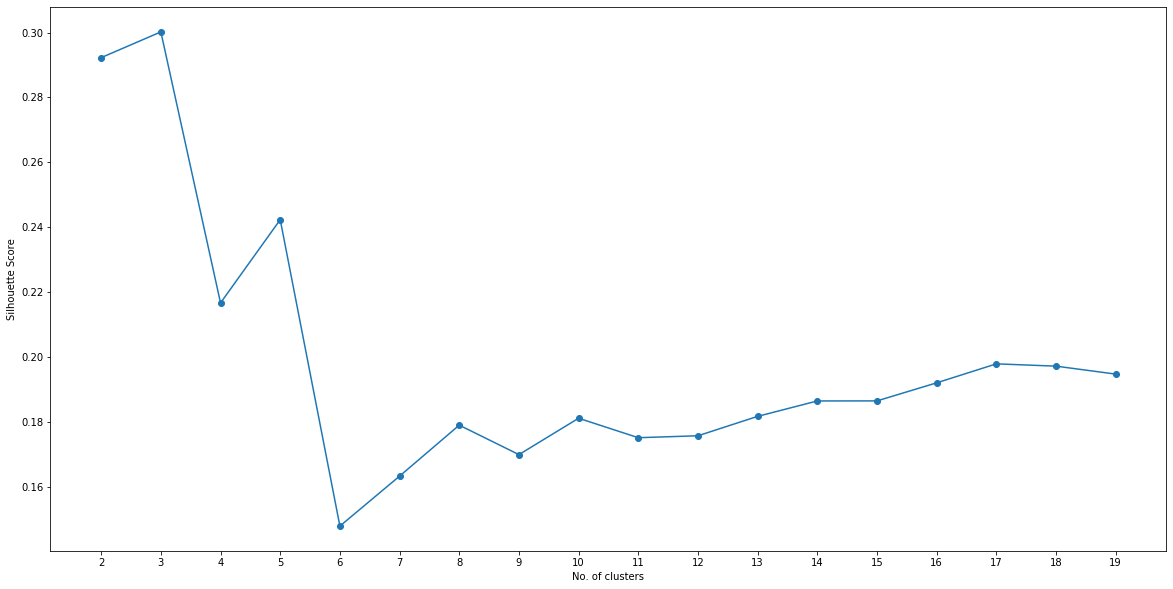

In [54]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

In [150]:
opt = np.argmax(scores) + 3 # Finds the optimal value
opt

3

In [151]:
kclusters = 3

# Run k-means clustering
kgc = kolkata_grouped_clustering
kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit(kgc)

In [152]:
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [153]:

kolkata_merged = df
kolkata_merged = kolkata_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')
kolkata_merged.dropna(inplace = True)
kolkata_merged['Cluster Labels'] = kolkata_merged['Cluster Labels'].astype(int)
kolkata_merged.head()

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abhirampur,22.530694,88.346503,0,Chinese Restaurant,Nightclub,Mughlai Restaurant,Bakery,Indian Restaurant,Dhaba,Hotel,Park,Bengali Restaurant,Awadhi Restaurant
1,Agarpara,22.684050,88.391650,0,ATM,Dhaba,Pharmacy,IT Services,Airport Terminal,Dessert Shop,Airport Lounge,Diner,Dumpling Restaurant,Duty-free Shop
2,Ajoy Nagar,22.489660,88.396400,0,Shopping Mall,Café,Multiplex,Grocery Store,Dhaba,Chinese Restaurant,Pizza Place,Sandwich Place,Metro Station,Fried Chicken Joint
3,Alipore,22.526600,88.335100,0,Café,Hotel,Chinese Restaurant,Dhaba,Park,Nightclub,Lounge,Asian Restaurant,Awadhi Restaurant,Movie Theater
4,Amodghata,22.988010,88.388380,1,ATM,Pharmacy,Indian Restaurant,Vegetarian / Vegan Restaurant,Convenience Store,Department Store,Dessert Shop,Dhaba,Diner,Dumpling Restaurant


In [166]:
val = 2
kolkata_merged.loc[kolkata_merged['Cluster Labels'] == (val - 1), kolkata_merged.columns[[0] + np.arange(4, kolkata_merged.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Amodghata,ATM,Pharmacy,Indian Restaurant,Vegetarian / Vegan Restaurant,Convenience Store,Department Store,Dessert Shop,Dhaba,Diner,Dumpling Restaurant
9,Asuti,ATM,Business Service,Falafel Restaurant,Food Court,Food,Flea Market,Field,Fast Food Restaurant,Farm,Electronics Store
12,Badartala,ATM,Train Station,River,Falafel Restaurant,Food,Flea Market,Field,Fast Food Restaurant,Farm,Electronics Store
24,Bamunari,ATM,Dhaba,Train Station,Falafel Restaurant,Food,Flea Market,Field,Fast Food Restaurant,Farm,Duty-free Shop
30,Bantala,ATM,Business Service,Falafel Restaurant,Food Court,Food,Flea Market,Field,Fast Food Restaurant,Farm,Electronics Store
39,Baruipur,ATM,Motorcycle Shop,Jewelry Store,Pharmacy,Hookah Bar,Hobby Shop,Department Store,Dessert Shop,Dhaba,Diner
40,Batanagar,ATM,Motorcycle Shop,Train Station,Falafel Restaurant,Food,Flea Market,Field,Fast Food Restaurant,Farm,Electronics Store
47,Benjanhari Acharial,ATM,Train Station,Electronics Store,Food,Flea Market,Field,Fast Food Restaurant,Farm,Falafel Restaurant,Duty-free Shop
50,Bhandardaha,ATM,Flea Market,Fried Chicken Joint,Dessert Shop,Dhaba,Diner,Dumpling Restaurant,Duty-free Shop,Electronics Store,Falafel Restaurant
52,"Bhasa, Bishnupur",ATM,Botanical Garden,Farm,Food Court,Food,Flea Market,Field,Fast Food Restaurant,Falafel Restaurant,Cricket Ground


In [155]:
# Create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# Set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(kolkata_merged['Latitude'], kolkata_merged['Longitude'], kolkata_merged['Neighbourhood'], kolkata_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' (Cluster ' + str(cluster + 1) + ')', parse_html=True)
    map_clusters.add_child(
        folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7))
       
map_clusters